In [ ]:
#LOAD DATA SET
with open('kmeans_data.txt', 'r') as file:
    data = file.read()

In [ ]:
import math
# SPLIT IT TO MAKE LIST OF LISTS
temp = data.split( )
data_set=[]
for i in range (0,len(temp),2):
  temp1 = []
  temp1.append(float(temp[i]))
  temp1.append(float(temp[i+1]))
  data_set.append(temp1)
print(data_set)

[[-0.65224338, -0.75800961], [3.8584055, 2.0623607], [-1.6328513, 5.3827894], [-4.7685935, 0.46966546], [-5.3827894, 1.6328513], [0.94597537, -1.2067484], [-1.2425256, 0.24611891], [-0.50284751, -1.4485356], [1.1355621, -0.56119791], [-4.5612633, 0.44924523], [-4.3859765, -1.3304714], [-2.0623607, 3.8584055], [1.0567392, -5.3125869], [4.5833333, 0.0], [4.3859765, -1.3304714], [-2.4551913, 4.5933399], [0.37495063, -0.92704478], [4.18714, 3.436297], [-4.3305709, 2.893595], [-1.2555724, -0.16727929], [-0.95014691, 0.31180259], [-1.4557681, -0.48150836], [-0.5960445, -1.1176652], [4.6193977, -1.9134172], [0.86025759, 0.50985966], [-3.3819207, 2.7754706], [-4.186614, 1.2699955], [0.82468216, -0.96142799], [1.2521396, -0.19128763], [-0.78488541, 0.61964094], [-1.2095195, -3.9872514], [-0.53092618, -5.3905839], [1.0729879, -1.0953575], [2.6621074, -3.9841252], [-0.73014469, -1.0350523], [-3.8584055, 2.0623607], [-0.70050772, 0.71364483], [0.19036808, -1.52147], [-0.93991538, -0.84911926], [-0

In [ ]:
# HANDCRAFTER FEATURE TRANSFORMATION
def kernel_function(a,b):
  return (a**2 + b**2)**(1/2)

In [ ]:
# APPLY KERNEL OF EVERY DATA POINT
new_set = []
for i in range (0,len(data_set)):
  new_set.append(kernel_function(data_set[i][0],data_set[i][1]))
print(new_set)

[0.9999999978030882, 4.374999961066827, 5.625000008236805, 4.7916666842090825, 5.625000008236805, 1.5333333302153178, 1.2666666430102862, 1.5333332980081533, 1.2666666401010087, 4.5833333032417185, 4.583333285368871, 4.374999961066827, 5.416666623198095, 4.5833333, 4.583333285368871, 5.208333299293326, 0.9999999995313227, 5.416666728884934, 5.20833335568604, 1.2666666540588585, 1.000000002856628, 1.5333333172299817, 1.2666667064667365, 5.0000000492021135, 0.9999999970239619, 4.374999962577468, 4.375000040573285, 1.2666666668771647, 1.2666667025224816, 1.0000000006774759, 4.166666671055198, 5.416666631014743, 1.5333333252599253, 4.791666663950008, 1.2666667012558932, 4.374999961066827, 1.0000000045826636, 1.5333332862697813, 1.2666666646215539, 4.374999998499861, 1.2666666942442382, 0.9999999976167258, 4.7916667, 0.999999994998991, 1.0000000012633539, 5.624999968406575, 1.2666666585475377, 4.375000055360936, 4.791666630180076, 1.0000000017537056, 4.1666667, 1.0000000014994692, 4.1666667

In [ ]:
import numpy as np
# ASSIGN FIRST TWO POINTS AS INITIAL MEANS FOR K-MEANS
mean1 = new_set[0]
mean2 = new_set[1]
cluster_id = []
for j in range(0,10):
  temp = []

  # COMPARE DISTANCE OF EVERY DATA POINT WITH BOTH MEANS
  for i in range (0,len(new_set)):
    dist1 = ((np.linalg.norm(mean1 - new_set[i]))**2)
    dist2 = ((np.linalg.norm(mean2 - new_set[i]))**2)
    #ASSIGN DATA POINT TO CLOSER MEAN CLUSTER
    if dist1 < dist2:
      temp.append(1)
    else:
      temp.append(2)

  # FINDING NEW MEANS
  c1 = 0
  c2 = 0
  sum1 = 0
  sum2 = 0
  for i in range (len(temp)):
    if(temp[i]==1):
      c1+=1
      sum1 += new_set[i]
    else:
      c2+=1
      sum2 += new_set[i]
  mean1 = sum1/c1
  mean2 = sum2/c2
  cluster_id = temp

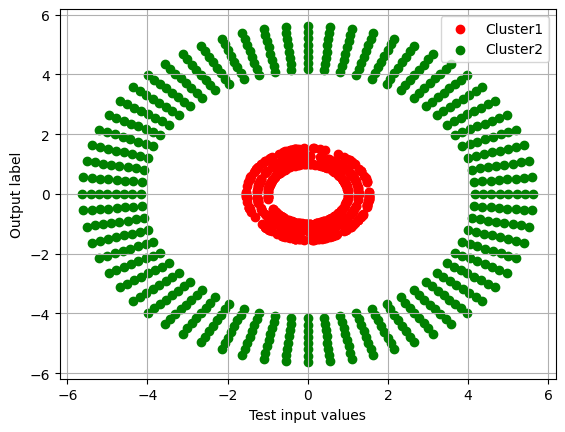

In [ ]:
import matplotlib.pyplot as plt
# PLOT THE SCATTER GRAPH
x1 = []
y1 = []
x2 = []
y2 = []
for i in range (len(cluster_id)):
  if(cluster_id[i] == 1):
    x1.append(data_set[i][0])
    y1.append(data_set[i][1])
  else:
    x2.append(data_set[i][0])
    y2.append(data_set[i][1])
plt.scatter(x1, y1, color='r',label = "Cluster1")
plt.scatter(x2, y2, color='g',label = "Cluster2")
plt.xlabel('Test input values')
plt.ylabel('Output label')
plt.legend()
plt.grid()
plt.show()